In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import pi, sqrt

# Leap Frog Method

Let' say we want to solve the simple harmonic oscilattor equation

$$\frac{d^2y}{dx^2} = -\omega^2x$$

So the leap frog algorithm is like

$$ y_{n} = y_n + hv_{n+1/2} $$
$$ v_{n+3/2} = v_{n+1/2} - h\omega^2 y_{n} $$

In [ ]:
omega = 1
y = 0
v = 1
x = 0
xf = 1e1
n = 1000
h = (xf-x)/n
ys = []
vs = []
xs = []

In [ ]:
def f(x):
    return -omega**2*x

In [ ]:
for i in range(n):
    v12 = v + h*f(y)
    y += h*v12
    v = v12 + h*f(y)
    
    x += h
    xs.append(x)
    ys.append(y)
    vs.append(v)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(xs,ys)

In [ ]:
omega = 1
y = 0
v = 1
x = 0
xf = 1e2
n = 1000
h = (xf-x)/n
ys = []
vs = []
xs = []

for i in range(n):
    y += v*h
    v += f(y)*h
    x += h
    ys.append(y)
    xs.append(x)
    vs.append(v)
    
omega = 1
y = 0
v = 1
x = 0
xf = 1e2
n = 1000
h = (xf-x)/n

ys_l = []
vs_l = []
xs_l = []

for i in range(n):
    v += h*f(y)/2
    y += h*v
    v += h*f(y)/2
    
    x += h
    xs_l.append(x)
    ys_l.append(y)
    vs_l.append(v)

In [ ]:
plt.plot(xs,ys, label = 'Euler')
# plt.plot(xs_l,ys_l,label="Leap Frog")
plt.legend();

In [ ]:
plt.plot(ys_l,vs_l)
plt.axis("equal");

# solving newton's lows using verlet algorithms

$$ s\'{o}cC $$

So the coupled differential equation for the system of planet orbiting around the star is:


$$\frac{d^2x}{dt^2} = -\frac{x}{(x^2+y^2)^{3/2}}$$
$$\frac{d^2y}{dt^2} = -\frac{y}{(x^2+y^2)^{3/2}}$$

In [ ]:
#intial varivables
x = 2
y = 0
vx = 0
vy = 0.6
t = 0
tf = 50

n = 1000
h = (tf-t)/n

#lists to store varivabels
xs = [x]
ys = [y]
ts = [t]


def ax(x,y):
    return -x/pow(x**2 + y**2, 3/2)
        

def ay(x,y):
    return -y/pow(x**2 + y**2, 3/2)

# the verlet algorithms
for i in range(n):
    vx += h/2*ax(x,y)
    vy += h/2*ay(x,y)
    
    x += vx*h
    y += vy*h
    
    vx += h/2*ax(x,y)
    vy += h/2*ay(x,y)
    
    t += h
    
    xs.append(x)
    ys.append(y)
    ts.append(t)
    

In [ ]:
plt.plot(xs,ys)

In [ ]:
plt.plot(ts,xs, label="Xs")
plt.plot(ts,ys, label= "ys")
plt.legend();

A simple __N-Body__ simulation problem is gievn here:

$$F(\textbf{x}) = \sum_{i=1}^{n} \frac{GMm_i}{|x-x_i|^3}(x-x_i)$$

In [46]:
G = 1
M = 1.989e30 #mass of sun
Me = 5.9e24

In [71]:
#initial conditions
N = 2 #this is N body probms
dim = 1 #number of dimession

# Ms = np.array([0.330, 4.87, 5.97,0.642,1898,568,86.8,102])
Ms = [100,2]
Ms = Ms
steps = 100

xs = np.zeros((steps,N))
ys = np.zeros((steps,N))
# xs[0] = np.array((57.9,108.2,149.6,227.9,778.6,1433.5,2872.5,4495.1))
xs[0] = np.array([0,2])
ys[0] = np.array([0,0])

In [72]:
def ax(i, iteration,x,y):
    s = 0
    for l in range(N):
        if l ==i:
            continue
        else:
            r = ((x-xs[iteration][l])**2 + (y-ys[iteration][l])**2)**(1.5)
            if r==0:
                return 0
            s += -(x-xs[iteration][l])/r

    return s

def ay(i, iteration, x,y):
    s = 0
    for l in range(N):
        if l ==i:
            continue
        else:
            r = ((x-xs[iteration][l])**2 + (y-ys[iteration][l])**2)**(1.5)
            if r == 0:
                return 0
            s += -(y-ys[iteration][l])/r

    return s   

In [73]:
vx =  np.zeros((steps,N))
vy = np.zeros((steps,N))
# vs[0] = np.array((47.4,35.0,29.8,24.1,13.1,9.7,6.8,5.4))
vx[0] = np.array((0,0))
vy[0] = np.array((0,0.6))
t = 0
tf = 10
ts = np.linspace(t,tf,steps)
dt = np.diff(ts)[0]

In [74]:
for step in range(steps):
    
    for i in range(N):
        vx[step][i] = vx[step-1][i] + ax(i, step-1, xs[step-1][i], ys[step-1][i])*dt/2
        vy[step][i] = vx[step-1][i] + ay(i, step-1, xs[step-1][i], ys[step-1][i])*dt/2
        
        xs[step-1][i] = xs[step-1][i] + dt*vx[step][i]
        ys[step-1][i] = ys[step-1][i] + dt*vy[step][i]
        
#         print(ay(i, step, xs[step][i], ys[step][i])*dt/2)
        
        vx[step][i] += ax(i, step, xs[step][i], ys[step][i])*dt/2
        vy[step][i] += ay(i, step, xs[step][i], ys[step][i])*dt/2
        
        

In [75]:
ys

array([[ 1.27538006e-03, -1.27456365e-03],
       [ 2.55076013e-03,  2.77211588e+02],
       [ 2.55076013e-03,  5.54425731e+02],
       [ 2.55076013e-03,  8.31639873e+02],
       [ 2.55076013e-03,  1.10885402e+03],
       [ 2.55076013e-03,  1.38606816e+03],
       [ 2.55076013e-03,  1.66328230e+03],
       [ 2.55076013e-03,  1.94049644e+03],
       [ 2.55076013e-03,  2.21771059e+03],
       [ 2.55076013e-03,  2.49492473e+03],
       [ 2.55076013e-03,  2.77213887e+03],
       [ 2.55076013e-03,  3.04935301e+03],
       [ 2.55076013e-03,  3.32656716e+03],
       [ 2.55076013e-03,  3.60378130e+03],
       [ 2.55076013e-03,  3.88099544e+03],
       [ 2.55076013e-03,  4.15820958e+03],
       [ 2.55076013e-03,  4.43542373e+03],
       [ 2.55076013e-03,  4.71263787e+03],
       [ 2.55076013e-03,  4.98985201e+03],
       [ 2.55076013e-03,  5.26706615e+03],
       [ 2.55076013e-03,  5.54428030e+03],
       [ 2.55076013e-03,  5.82149444e+03],
       [ 2.55076013e-03,  6.09870858e+03],
       [ 2.

In [78]:
xxs = [xs[i][1] for i in range(steps)]
yys = [ys[i][1] for i in range(steps)]

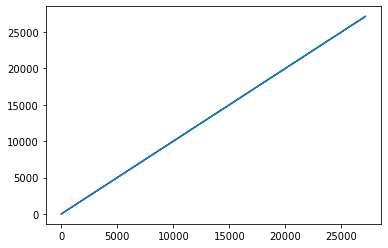

In [79]:
plt.plot(xxs,yys);

In [64]:
xs

array([[ 0.390625  ,  1.50959986],
       [ 0.390625  ,  1.31979322],
       [ 0.390625  ,  3.12998658],
       [ 0.390625  ,  4.94017994],
       [ 0.390625  ,  6.7503733 ],
       [ 0.390625  ,  8.56056666],
       [ 0.390625  , 10.37076002],
       [ 0.390625  , 12.18095338],
       [ 0.        ,  0.        ]])

In [283]:
def ax(i, iteration, x, y):
    r = ((x-xs[iteration][i])**2 + (y-ys[iteration][i])**2)**(1.5)
    if r==0:
        return 0
    return -(x-xs[iteration][i])/r

def ay(i, iteration, x, y):
    r = ((x-xs[iteration][i])**2 + (y-ys[iteration][i])**2)**(1.5)
    if r==0:
        return 0
    return -(y-ys[iteration][i])/r